In [196]:
import numpy as np
import pandas as pd
import torch
import torchvision
from torch import nn
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset
import torch.nn.functional as F

In [197]:
training = torchvision.datasets.CIFAR10('./data',train=True,download=True)
testing =  torchvision.datasets.CIFAR10('./data',train=False,download=True)


Training_Image = torch.from_numpy(training.data).permute(0,3, 1, 2).float()
Training_Labels = torch.LongTensor(training.targets)
Training_Image = Training_Image / 255

Testing_Image = torch.from_numpy(testing.data).permute(0,3, 1, 2).float()
Testing_Labels =  torch.LongTensor(testing.targets)
Testing_Image = Testing_Image/255

Files already downloaded and verified
Files already downloaded and verified


In [198]:
training.data.shape

(50000, 32, 32, 3)

In [199]:
valid_data,test_data, valid_labels,test_labels = train_test_split(Testing_Image , Testing_Labels, test_size=.6)


train_data = TensorDataset(Training_Image,Training_Labels)
valid_data  = TensorDataset(valid_data,valid_labels)
test_data  = TensorDataset(test_data,test_labels)

Train_Loader =  DataLoader(train_data,batch_size=1024,shuffle=True,drop_last=True)
Valid_Loader = DataLoader(valid_data,batch_size=valid_data.tensors[0].shape[0])
Test_Loader = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [200]:
train_data.tensors[0].shape[0]

50000

In [201]:
class CifarModel(torch.nn.Module):
    def __init__(self):
        super(CifarModel, self).__init__()
        
        self.con_1 = nn.Conv2d(3,16,3)
        
        self.con_2 = nn.Conv2d(16,32,3)
        
        self.con_3 = nn.Conv2d(32,64,3)
        
        self.flatten = nn.Flatten()
        
        self.fl_1 = nn.Linear(256,128)
        
        self.fl_2 = nn.Linear(128,10)
    
    def forward(self,x):
        
        x = F.relu(F.max_pool2d(self.con_1(x),2))
        
        x = F.relu(F.max_pool2d(self.con_2(x),2))
        
        x = F.relu(F.max_pool2d(self.con_3(x),2))
        
        x = self.flatten(x)
        
        x = F.relu(self.fl_1(x))
        
        return (self.fl_2(x))

net = CifarModel()
lossfun = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(),lr=.001)
lossf = []       

In [202]:
for epochs in range(100):
    
  
    
    for X,y in Train_Loader:
        
        yhat  = net(X)
        loss = lossfun(yhat,y)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
    x_1,y_1 = next(iter(Valid_Loader))
    
    vhat  = net(x_1)
    
    lossf.append(lossfun(vhat,y_1).item())
    
    print("Epoch done",epochs,loss.item(),lossf[-1])

Epoch done 0 1.9080171585083008 1.9107569456100464
Epoch done 1 1.784816861152649 1.7848401069641113
Epoch done 2 1.7239744663238525 1.6992864608764648
Epoch done 3 1.6460225582122803 1.6553010940551758
Epoch done 4 1.560170292854309 1.5886582136154175
Epoch done 5 1.5499260425567627 1.5426349639892578
Epoch done 6 1.503045678138733 1.4954956769943237
Epoch done 7 1.413352131843567 1.4665300846099854
Epoch done 8 1.4083857536315918 1.4297246932983398
Epoch done 9 1.3524895906448364 1.4171669483184814
Epoch done 10 1.3734785318374634 1.3760467767715454
Epoch done 11 1.3471746444702148 1.3780832290649414
Epoch done 12 1.3411871194839478 1.3362988233566284
Epoch done 13 1.276234745979309 1.2975300550460815
Epoch done 14 1.2999253273010254 1.2835134267807007
Epoch done 15 1.3707853555679321 1.2813221216201782
Epoch done 16 1.2463470697402954 1.2604889869689941
Epoch done 17 1.2327795028686523 1.2510595321655273
Epoch done 18 1.2108440399169922 1.2217129468917847
Epoch done 19 1.13350677490

68.4499979019165


<AxesSubplot:>

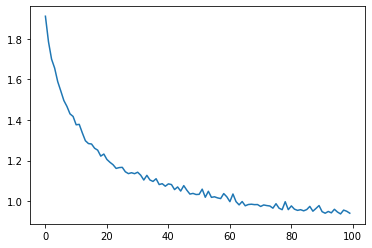

In [203]:
x_1,y_1 = next(iter(Test_Loader))
yhat  = net(x_1)

print(100*torch.mean((torch.argmax(yhat,axis=1) == y_1).float()).item())

pd.Series(lossf).plot()

In [164]:
# transformation = torchvision.transforms.Compose([
#     torchvision.transforms.RandomRotation(30),
#     torchvision.transforms.RandomHorizontalFlip(),
#     torchvision.transforms.RandomVerticalFlip(),
#     torchvision.transforms.CenterCrop(10),
#     torchvision.transforms.ToTensor()
#     ]
# )
# lossf
# net(next(iter(Train_Loader))[0]).shape